# Session 2 : Supervised Learning Overview




## Recap Questions

1. What are the basic types of Machine Learning?
2. Do you have an example of structured vs unstructured data?
3. What is data preprocessing and why it is important?


## 1. What is Supervised Machine Learning and what are the main categories?

Supervised machine learning is a type of machine learning where a model is trained on labeled data to make predictions or classifications about new data. In supervised learning, the model is trained on a dataset consisting of input data and corresponding output data, also known as "labels". For more: https://www.toptal.com/machine-learning/machine-learning-theory-an-introductory-primer

The main categories of supervised machine learning are:

1. Regression

2. Classification

### Regression

Regression is a supervised learning technique where the goal is to predict a continuous numerical value. The output in this type of model is a real-valued number. Linear regression and polynomial regression are common types of regression models.

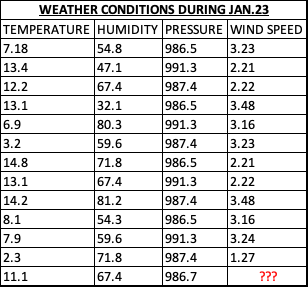

### Classification

Classification is a supervised learning technique where the goal is to predict the category or class of an input data point. The output in this type of model is a discrete value, such as a binary class (yes/no) or a multi-class output. Logistic regression, decision trees, and support vector machines are common classification models.

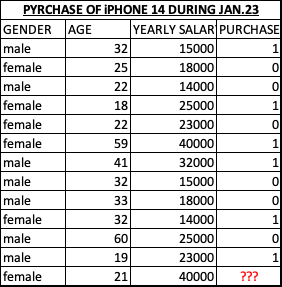

## 2. ML training steps

In the whole procedure we will use Scikit-learn, also known as sklearn, which is a popular machine learning library for the Python programming language. It provides a range of tools for constructing and analyzing machine learning models, including algorithms for classification, regression, clustering, and dimensionality reduction, as well as tools for data preprocessing, model evaluation, and feature selection. Scikit-learn is built on top of other popular Python libraries such as NumPy, SciPy, and matplotlib.

For more: https://scikit-learn.org/stable/

### 2.1. Inspect your dataset, deside your approach

In this step, and focusing on supervised learning, we have to inspect our dataset and to choose our approach. What type of problem we have to face?

PS: Usually the first step is the preprocessing of the dataset - or in other words, the preparation of our dataset in order to ready to be used for a machine learning algorithm. For more: https://www.v7labs.com/blog/data-preprocessing-guide

In [ ]:
# QUESTION 2.1.1 : Given that the "target" column in the following table is the column you want to predict, 
# what is the type of problem you have to solve?

from sklearn.datasets import load_iris
import pandas as pd
df_temp = load_iris()
df1 = pd.DataFrame(df_temp.data, columns=df_temp.feature_names)
df1["target"] = df_temp.target
df1

In [ ]:
# QUESTION 2.1.2 : Given that the "target" column in the following table is the column you want to predict, 
# what is the type of problem you have to solve?

from sklearn.datasets import load_diabetes
import pandas as pd
df_temp = load_diabetes()
df2 = pd.DataFrame(df_temp.data, columns=df_temp.feature_names)
df2["target"] = df_temp.target
df2

In [ ]:
# QUESTION 2.1.3 : Given that the "target" column in the following table is the column you want to predict, 
# what is the type of problem you have to solve?

from sklearn.datasets import load_breast_cancer
import pandas as pd
df_temp = load_breast_cancer()
df3 = pd.DataFrame(df_temp.data, columns=df_temp.feature_names)
df3["target"] = df_temp.target
df3

### 2.2. Splitting the dataset

Train-test split is a common technique used in machine learning to evaluate the performance of a model. It involves splitting a dataset into two parts: a training set and a testing set. The training set is used to train the model, and the testing set is used to evaluate how well the model performs on unseen data.

The idea behind this technique is to ensure that the model has not simply memorized the training data, but can also generalize well to new, unseen data. By testing the model on data it has not seen before, we can get a better estimate of its true performance and avoid overfitting.

Typically, a random subset of the data (e.g., 80%) is used for training, while the remaining subset (e.g., 20%) is used for testing. 

Usually we have to split our dataset in 4 parts:

1. X_train consists out of the data will be used for training an algorithm
2. y_train is consists out of the target, which along with X_train will be used for the training of the algorithm
3. X_test consists out of the data will be used to test how "good" our algorithm is.
4. y_test is the ground truth - will compare this with the predictions of our model

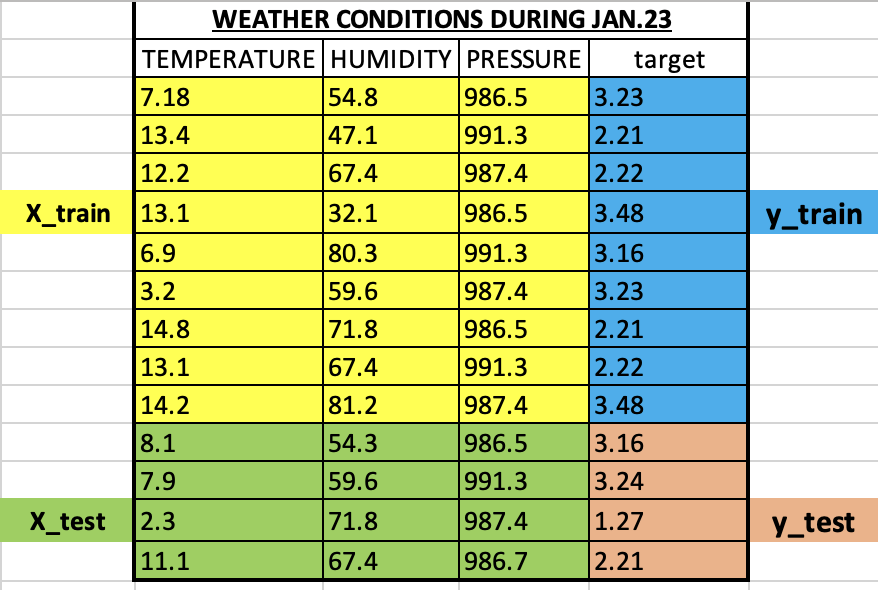


In [ ]:
from sklearn.model_selection import train_test_split

#Separate data and target
X = df3.drop('target',axis='columns')
y = df3['target']

#Use the train_test function to separate X-trai, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("The original dataset has {} rows".format(len(df3)))
print("The X train dataset has {} rows".format(len(X_train)))
print("The y train dataset has {} rows".format(len(y_train)))
print("The X test dataset has {} rows".format(len(X_test)))
print("The y test dataset has {} rows".format(len(y_test)))

### 2.3. Fit your problem to an algorithm

Choosing the right algorithm for a supervised machine learning problem depends on several factors, such as the type and size of data, the complexity of the problem, the available computing resources, and the desired performance metrics.

The most commonly used supervised machine learning algorithms are Linear Regression, Logistic Regression, Decision Trees, Random Forest, Support Vector Machines (SVM), Naive Bayes, Neural Networks.

It's important to note that there is no one-size-fits-all solution when it comes to choosing an algorithm for a supervised machine learning problem. It's often best to experiment with different algorithms and see which one performs the best on your specific problem. 

For more: https://www.malicksarr.com/how-to-choose-the-right-algorithm-in-machine-learning/

It is also important to highlight the use of hyperparameters here. Hyperparameters are parameters set before training a machine learning model, controlling its behavior and affecting its performance. Optimizing hyperparameters can improve model performance, but it can also be time-consuming. For instance, some examples of hyperparameters are learning rate, regularization strength, number of hidden layers in a neural network, number of trees in a random forest, and kernel type in an SVM.

In [ ]:
# In sklearn is pretty easy to train an algorithm
# Let's import the algorithm we wish to train
from sklearn.ensemble import RandomForestClassifier

# Lets assign this model to a variable
classifier = RandomForestClassifier()

# Simply fit your training data to the model
classifier.fit(X_train, y_train)

### 2.4. Evaluate your model

In this step we would like to know how good our model can perform. This is why we kapt X_test and y_test. For the needs of this session we will focus in one evaluation method for regression and one for classification.

1. Regression - MSE(mean square error): measures the average squared difference between the predicted and actual values.

2. Classification - Accuracy: measures the proportion of correctly classified instances out of the total number of instances.

For more: https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234

In [ ]:
# Insert the accuracy score from sklearn metrics
from sklearn.metrics import accuracy_score

# Using the predict function we predict the target based on X_test
y_pred = classifier.predict(X_test)

# Let's now calculate the accuracy score
acc_test = accuracy_score(y_test, y_pred)

print('Random Forest has an accuracy of {}% on unseen data.'.format(acc_test*100))

### 2.5. Tuning

In this step we have to tune our methodology in order to explore if we can improve our result. The model could overfit or underfit.

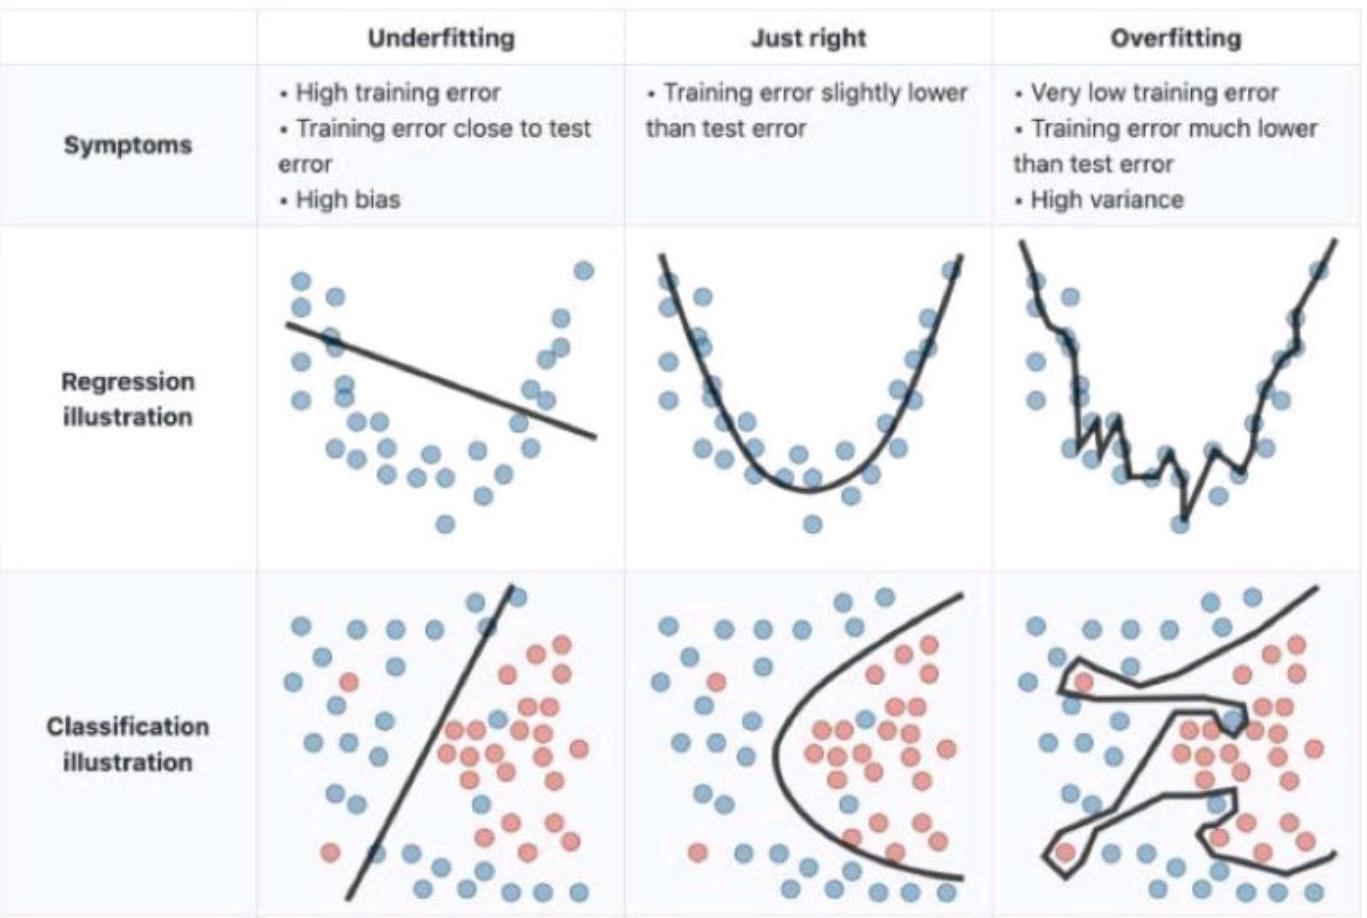

Basically there are 2 ways to do it:

1. Fine tune the hyperparameters of the model.

2. Try a different model.

We can see the available hyperparameters for Random Forest here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier

In [ ]:
# Lets create another classifier
# n_estimators default value -> 100
# criterion default value -> "gini"
classifier2 = RandomForestClassifier(n_estimators=10, criterion="entropy")

# Fit
classifier2.fit(X_train, y_train)

# Using the predict function we predict the target based on X_test
y_pred = classifier2.predict(X_test)

# Let's now calculate the accuracy score with new classifier
acc_test = accuracy_score(y_test, y_pred)

print('New Random Forest has an accuracy of {}% on unseen data.'.format(acc_test*100))

## 3. Regression example using Linear Regression

### 3.1. Inspect dataset

In [ ]:
from sklearn.datasets import load_diabetes
import pandas as pd
df_temp = load_diabetes()
df_reg = pd.DataFrame(df_temp.data, columns=df_temp.feature_names)
df_reg["target"] = df_temp.target
df_reg

### 3.2. Splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split

#Separate data and target
X = df_reg.drop('target',axis='columns')
y = df_reg['target']

#Use the train_test function to separate X-trai, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("The original dataset has {} rows".format(len(df_reg)))
print("The X train dataset has {} rows".format(len(X_train)))
print("The y train dataset has {} rows".format(len(y_train)))
print("The X test dataset has {} rows".format(len(X_test)))
print("The y test dataset has {} rows".format(len(y_test)))

### 3.3. Fit the problem to linear regression algorithm

Linear regression is a widely used technique in machine learning and statistical modeling for establishing a relationship between a dependent variable and one or more independent variables. The goal of linear regression is to find the best fit line that explains the relationship between the variables.

In simple linear regression, there is only one independent variable, and the relationship between the independent variable and dependent variable is modeled using a straight line equation, represented as y = mx + c, where y is the dependent variable, x is the independent variable, m is the slope of the line, and c is the y-intercept.

In multiple linear regression, there are two or more independent variables, and the relationship between the independent variables and the dependent variable is modeled using a linear equation, represented as y = b0 + b1x1 + b2x2 + ... + bnxn, where y is the dependent variable, x1, x2, ..., xn are the independent variables, and b0, b1, b2, ..., bn are the coefficients of the independent variables.

So let's imagine that we have the below table:
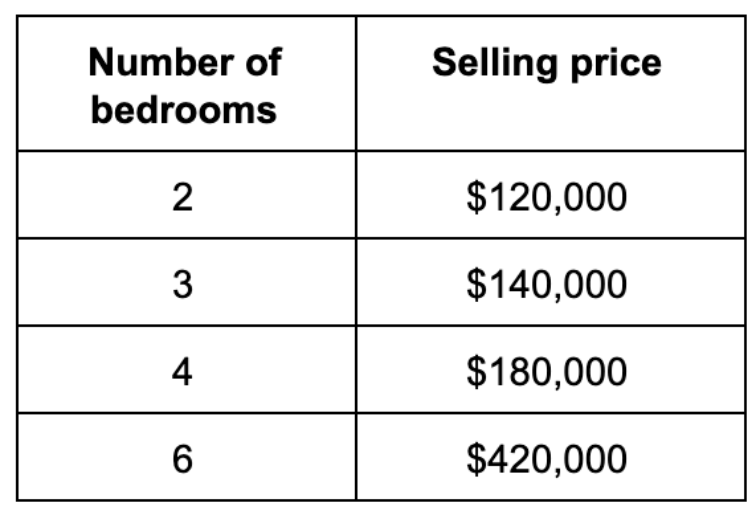

Drawing those info in a plot we have something like:
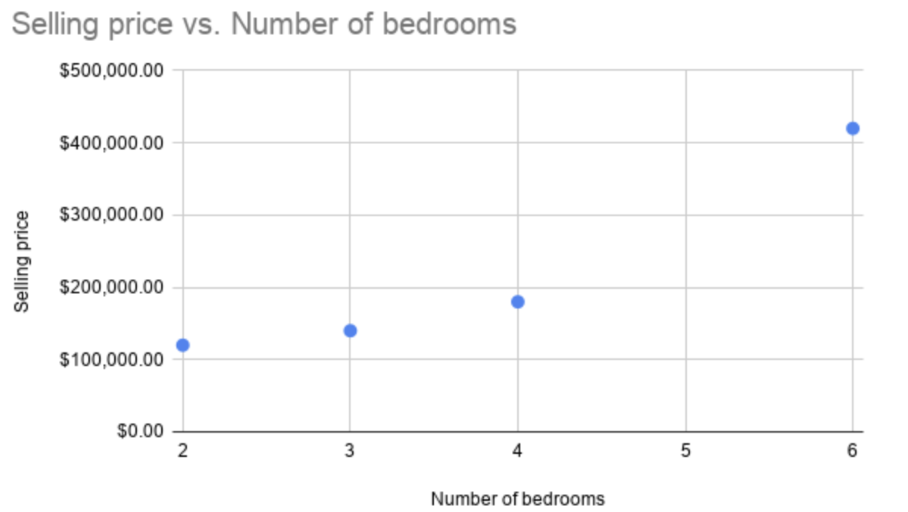

If we perform a linear regression in those data we will have the below plot:
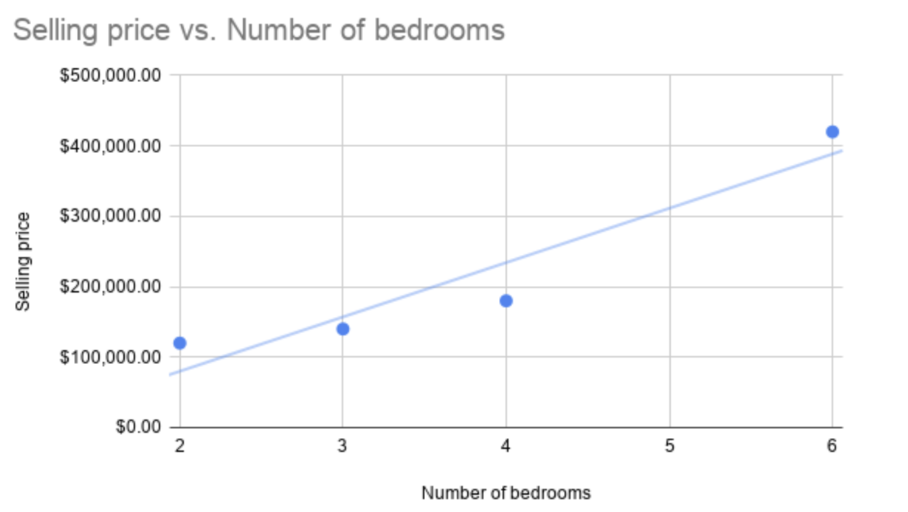

This allow us to predict the value of each house given the number of beddrooms. For instance for 5 bedrooms the price would be approximately 310K $.

In [ ]:
# In sklearn is pretty easy to train an algorithm
# Let's import the algorithm we wish to train
from sklearn.linear_model import LinearRegression

# Lets assign this model to a variable
regressor = LinearRegression()

# Simply fit your training data to the model
regressor.fit(X_train, y_train)

### 3.4. Evaluate the model

As we are talking for a regression model we have to evaluate it on MSE. The closer the MSE to 0, the better the model.

In [ ]:
# Insert the accuracy score from sklearn metrics
from sklearn.metrics import mean_squared_error

# Using the predict function we predict the target based on X_test
y_pred = regressor.predict(X_test)

# Let's now calculate the accuracy score
mse = mean_squared_error(y_test, y_pred)

print('Linear Regressor has an mse of {} on unseen data.'.format(mse))

**Question: Lets assume that the error is huge. What does this mean for the model, what we have to do?**

### 3.5. Tuning

As we assumed that the error is huge, this means that the linear regression model is too simple for our problem. The solution is to change the model and to use one of a higher degree. Let's try gradient boosting regressor instead. 

Gradient Boosting Regressor is a supervised learning algorithm used for regression tasks. It is a type of ensemble learning method that combines multiple weaker models to form a stronger predictive model. The model is trained iteratively, where each new model corrects the errors made by the previous models.

For more: https://towardsdatascience.com/all-you-need-to-know-about-gradient-boosting-algorithm-part-1-regression-2520a34a502


In [ ]:
# At first we need to import again Linear Regression
# and fit out data
from sklearn.ensemble import GradientBoostingRegressor

reg2=GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)

reg2.fit(X_train, y_train)

In [ ]:
# Insert the accuracy score from sklearn metrics
from sklearn.metrics import mean_squared_error

# Using the predict function we predict the target based on X_test
y_pred = reg2.predict(X_test)

# Let's now calculate the accuracy score
mse = mean_squared_error(y_test, y_pred)

print('GBR has an mse of {} on unseen data, means that it is better than Linear Regression. '.format(mse))

## 4. Classification example using Decision Trees

### 4.1. Inspect the dataset

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
df_temp = load_iris()
df_clas = pd.DataFrame(df_temp.data, columns=df_temp.feature_names)
df_clas["target"] = df_temp.target
df_clas

### 4.2. Splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split

#Separate data and target
X = df_clas.drop('target',axis='columns')
y = df_clas['target']

#Use the train_test function to separate X-trai, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("The original dataset has {} rows".format(len(df_reg)))
print("The X train dataset has {} rows".format(len(X_train)))
print("The y train dataset has {} rows".format(len(y_train)))
print("The X test dataset has {} rows".format(len(X_test)))
print("The y test dataset has {} rows".format(len(y_test)))

### 4.3. Fit the problem to decision trees algorithm.

Decision Trees algorithm is a supervised learning algorithm used for both classification and regression tasks. It is a tree-based model that recursively partitions the input space into subsets based on the values of the input features, where each partition corresponds to a decision node in the tree. The final output of the model is the prediction made by the leaf node reached by following the path from the root node to the leaf node.

Let's assume that we have the following dataset:
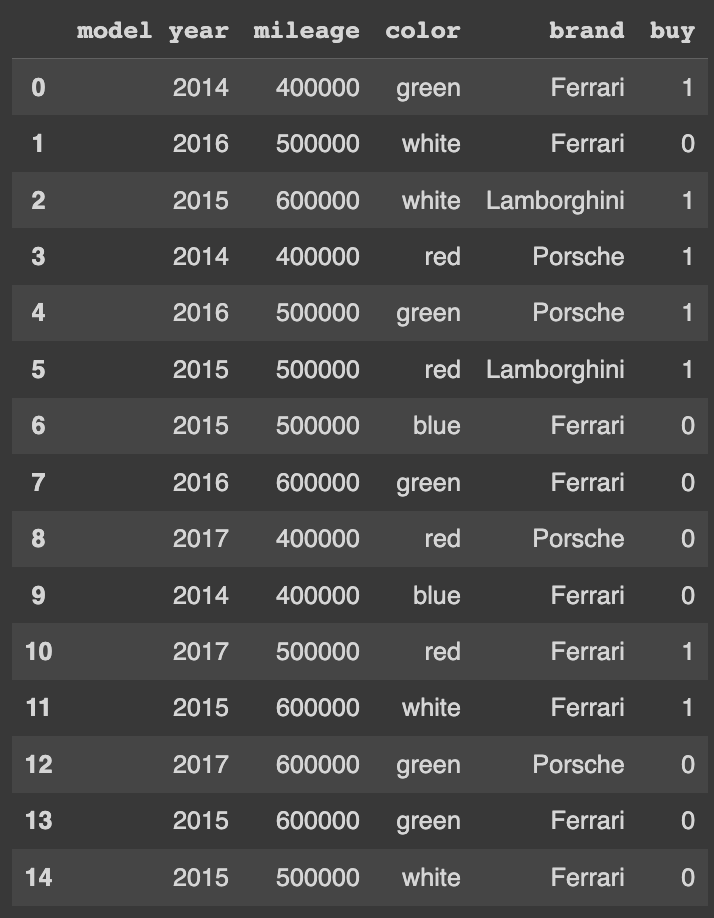

Wanted to predict if we will buy the car based on the other features the decision tree will look like:
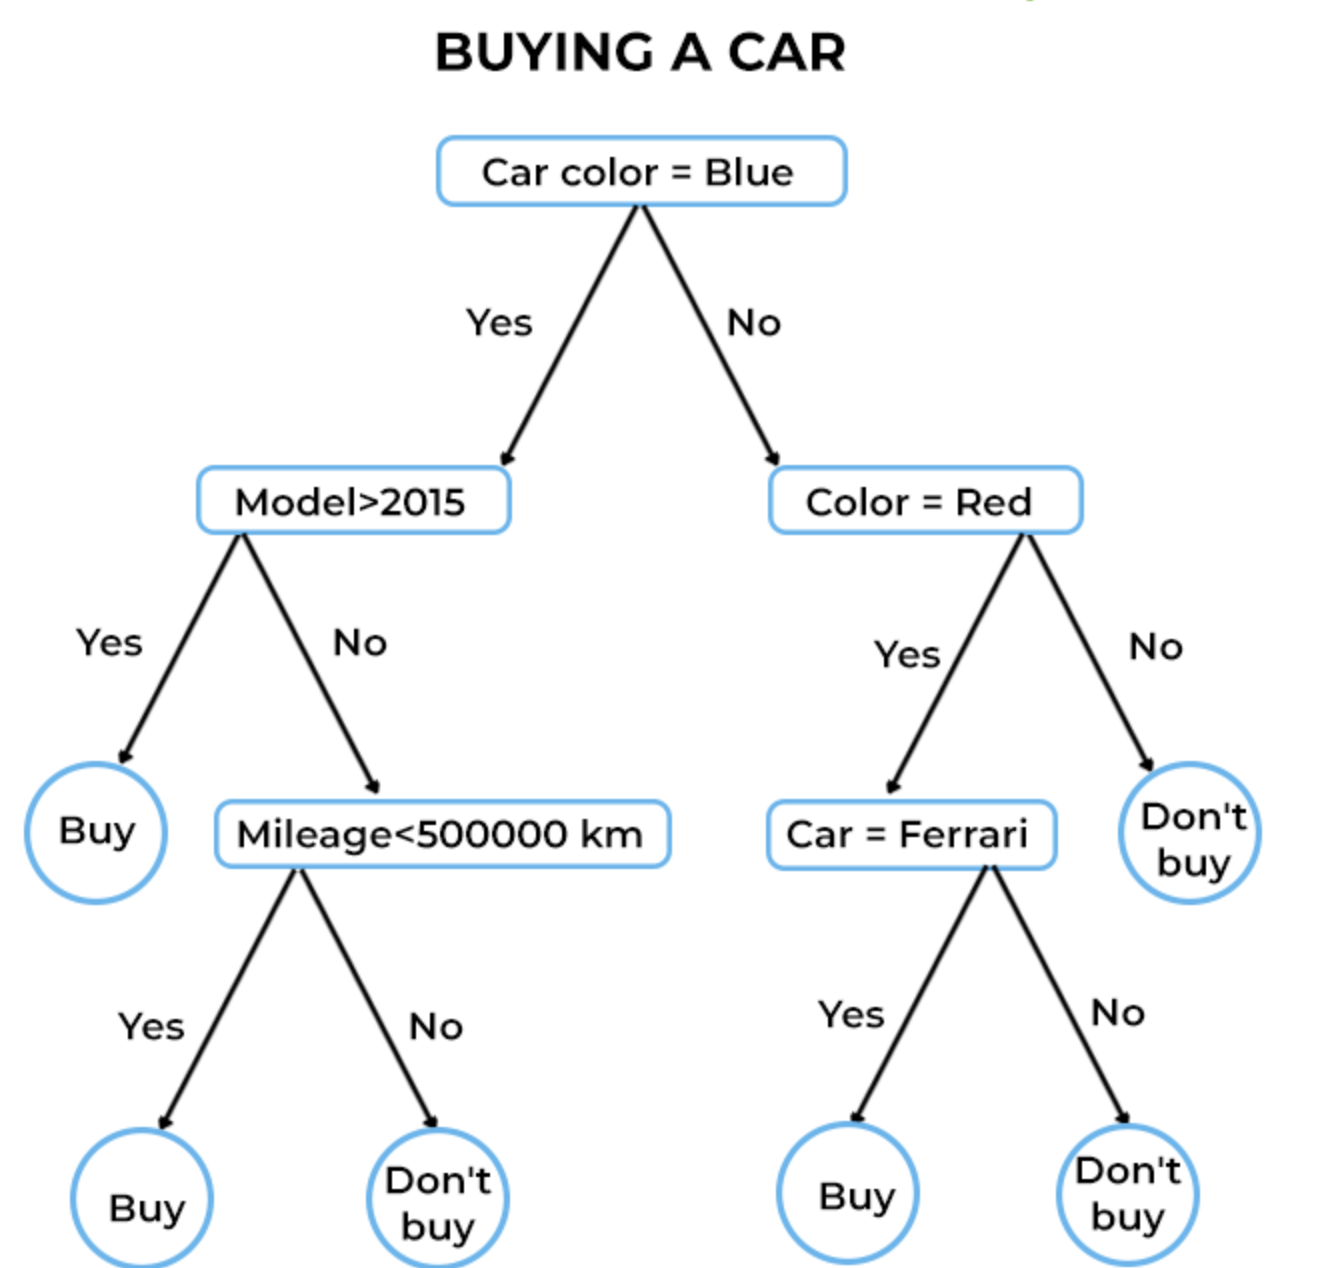

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion="gini", max_depth=2, max_leaf_nodes=2)

clf.fit(X_train,y_train)


### 4.4. Evaluate the model

As we are talking for a classification model we have to evaluate it on accuracy. The closer the MSE to 100%, the better the model.

In [ ]:
# Predict Accuracy Score

y_pred = clf.predict(X_test)

acc = accuracy_score(y_true = y_test, y_pred=y_pred)

print('Decision Tree has an accuracy of {}% on unseen data'.format(acc*100))

**Question: Lets assume that the error is not that big and there is room for improvement. What does this mean for the model, what we have to do?**

### 5.5 Tuning

As we assumed that the error is not that big and there is room for improvement using the same model, this means that we can try different combinations of hyperparameters to improve our accuracy.

To check what are the possible hyperparameters for decision trees follow the link: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
clf2 = DecisionTreeClassifier(criterion="entropy", max_depth=10, max_leaf_nodes=10)

clf2.fit(X_train,y_train)

y_pred = clf2.predict(X_test)

acc = accuracy_score(y_true = y_test, y_pred=y_pred)

print('Tuned Decision Tree has an accuracy of {}% on unseen data which is better that the previous version of it.'.format(acc*100))